<div class="alert alert-block alert-info" style="margin-top: 20px">
 <a href="http://cocl.us/pytorch_link_top"><img src = "http://cocl.us/Pytorch_top" width = 950, align = "center"></a>

<img src = "https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width = 200, align = "center">

<h1 align=center><font size = 5>Multiple Linear Regression  </font></h1> 

# Table of Contents
In this lab, you will create a model the Pytroch way. This will help you more complicated models. 

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref0">Make Some Data</a></li>
<li><a href="#ref1">Create the Model and Cost Function the Pytorch way</a></li>
<li><a href="#ref2">Train the Model: Batch Gradient Descent</a></li>
<li><a href="#ref3">Practice Questions</a></li>
<br>
<p></p>
Estimated Time Needed: <strong>20 min</strong>
</div>

<hr>

Import the following libraries:  

In [1]:
from torch import nn,optim
import torch
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader

Set the random seed:

In [2]:
torch.manual_seed(1)

Use this function for plotting: 

In [3]:
def Plot_2D_Plane(model,dataset,n=0):
    from mpl_toolkits.mplot3d import Axes3D
    w1=model.state_dict()['linear.weight'].numpy()[0][0]
    w2=model.state_dict()['linear.weight'].numpy()[0][0]
    b=model.state_dict()['linear.bias'].numpy()

    #data
    x1 =data_set.x[:,0].view(-1,1).numpy()
    x2 = data_set.x[:,1].view(-1,1).numpy()
    y = data_set.y.numpy()

    #make plane
    X, Y = np.meshgrid(np.arange(x1.min(), x1.max(), 0.05), np.arange(x2.min(), x2.max(), 0.05))
    yhat = w1*X+w2*Y+b

    #plotting
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.plot(x1[:,0],x2[:,0],y[:,0],'ro',label='y') #scatter plot
    
    ax.plot_surface(X,Y,yhat) #plane plot
    
    ax.set_xlabel('x1 ')
    ax.set_ylabel('x2 ')
    ax.set_zlabel('y')
    #ax.set_ylim((y.min()-3, y.max()+3))
    plt.title('estimated plane iteration:'+str(n))
    ax.legend()

    plt.show()

<a id="ref0"></a>
<h2 align=center>Make Some Data </h2>

Create a dataset class with two-dimensional features:

In [4]:
from torch.utils.data import Dataset, DataLoader
class Data2D(Dataset):
    def __init__(self):
            self.x=torch.zeros(20,2)
            self.x[:,0]=torch.arange(-1,1,0.1)
            self.x[:,1]=torch.arange(-1,1,0.1)
            self.w=torch.tensor([ [1.0],[1.0]])
            self.b=1
            self.f=torch.mm(self.x,self.w)+self.b
            
            self.y=self.f+0.1*torch.randn((self.x.shape[0],1))
            self.len=self.x.shape[0]

    def __getitem__(self,index):          
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len

Create a dataset object:

In [5]:
data_set=Data2D()

<a id="ref1"></a>
<h2 align=center>Create the Model, Optimizer, and Total Loss Function (cost)</h2>

Create a custom module: 

In [6]:
class linear_regression(nn.Module):
    def __init__(self,input_size,output_size):
        super(linear_regression,self).__init__()
        self.linear=nn.Linear(input_size,output_size)
    def forward(self,x):
        yhat=self.linear(x)
        return yhat

Create a model. Use two features: make the input size 2 and the output size 1: 

In [25]:
model=linear_regression(2,1)


Display the parameters: 

In [8]:
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.6209, -0.1178]], requires_grad=True), Parameter containing:
tensor([0.3026], requires_grad=True)]


Create an optimizer  object. Set the learning rate to 0.1. **Don't forget to enter the model parameters in the constructor.**  

<img src = "https://ibm.box.com/shared/static/f8hskuwrnctjg21agud69ddla0jkbef5.png" width = 100, align = "center">


In [9]:
optimizer = optim.SGD(model.parameters(), lr = 0.1)

Create the criterion function that calculates the total loss or cost:

In [10]:
criterion = nn.MSELoss()

Create a data loader object. Set the batch_size equal to 2: 

In [26]:
train_loader=DataLoader(dataset=data_set,batch_size=2)

<a id="ref2"></a>
<h2 align=center>Train the Model via Mini-Batch Gradient Descent </h2>

Run 100 epochs of Mini-Batch Gradient Descent and store the total loss or cost for every iteration. Remember that this is an approximation of the true total loss or cost:

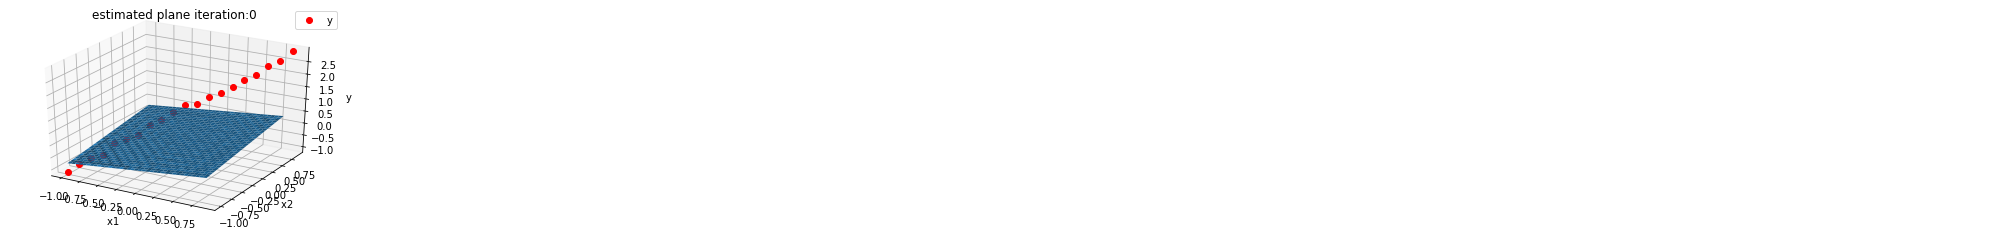

In [27]:
LOSS=[]
Plot_2D_Plane(model,data_set)   
epochs=100
   
    
for epoch in range(epochs):
    for x,y in train_loader:
        #make a prediction 
        yhat=model(x)
        #calculate the loss
        loss=criterion(yhat,y)
        #store loss/cost 
        LOSS.append(loss.item())
        #clear gradient 
        optimizer.zero_grad()
        #Backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        #the step function on an Optimizer makes an update to its parameters
        optimizer.step()
     

    

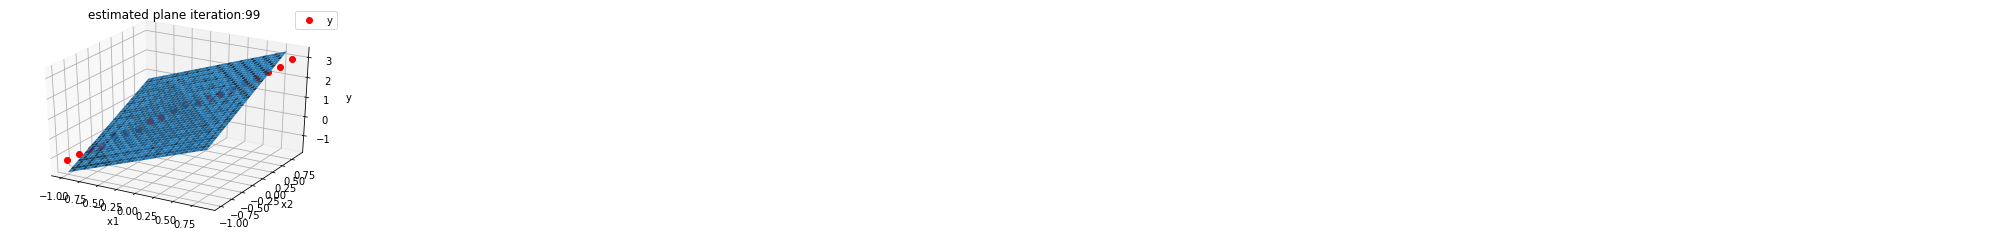

In [13]:
Plot_2D_Plane(model,data_set,epoch)   

Text(0, 0.5, 'Cost/total loss ')

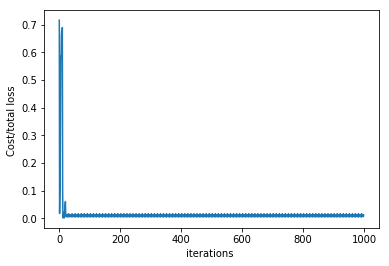

In [14]:
plt.plot(LOSS)
plt.xlabel("iterations ")
plt.ylabel("Cost/total loss ")

<a id="ref3"></a>
<h2>Practice Questions</h2>

#### Create a new <code>model1</code>. Train the model with a batch size of 30, store the loss or total cost in a list <code>LOSS1</code>, and plot the results.

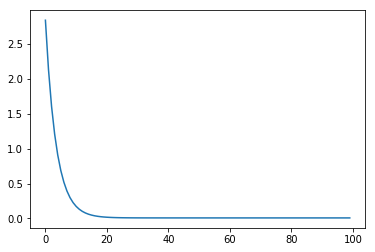

In [30]:
model1 = linear_regression(data_set.x.shape[1],1)
LOSS1 = []
trainloader = DataLoader(dataset = data_set,batch_size = 30)
epochs = 100
optimizer = optim.SGD(model1.parameters(), lr = 0.1)

for epoch in range(epochs):
    for x,y in trainloader:
        yhat = model1(x)
        loss = criterion(yhat,y)
        LOSS1.append(loss.data.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

plt.plot(LOSS1)

Double-click __here__ for the solution.

<!-- Your answer is below:
train_loader=DataLoader(dataset=data_set,batch_size=30)
model1=linear_regression(2,1)
optimizer = optim.SGD(model1.parameters(), lr = 0.1)
LOSS1=[]
epochs=100
for epoch in range(epochs):
    for x,y in train_loader:
        #make a prediction 
        yhat=model1(x)

        #calculate the loss
        loss=criterion(yhat,y)
        LOSS1.append(loss.item())
        #clear gradient 
        optimizer.zero_grad()
        #Backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        #the step function on an Optimizer makes an update to its parameters
        optimizer.step()
    plt.plot(LOSS1)
    plt.xlabel("iterations ")
    plt.ylabel("Cost/total loss ")        -->

#### Use the following validation data to calculate the total loss or cost for both models:  
 

In [31]:
torch.manual_seed(2)

validation_data=Data2D()
Y=validation_data.y
X=validation_data.x

lossA = criterion(model(X),Y)

lossB = criterion(model1(X),Y)

print(lossA, lossB)

tensor(2.4447, grad_fn=<MseLossBackward>) tensor(0.0081, grad_fn=<MseLossBackward>)


Double-click __here__ for the solution.
<!-- Your answer is below:
print("total loss or cost  for model: ",criterion(model(X),Y))
print("total loss or cost  for model: ",criterion(model1(X),Y))
-->

### About the Authors:  

 [Joseph Santarcangelo]( https://www.linkedin.com/in/joseph-s-50398b136/) has a PhD in Electrical Engineering. His research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. 

Other contributors: [Michelle Carey](  https://www.linkedin.com/in/michelleccarey/), [Mavis Zhou](  https://www.linkedin.com/in/jiahui-mavis-zhou-a4537814a/) 

<hr>

Copyright &copy; 2018 [cognitiveclass.ai](cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).